# Welcome to the Machine Learning Algorithms Workshop!

## Importing the Relevant Libraries
We'll be using Pandas, the data collection library today for easy reading of .CSV(Comma Separated Values) files.

We'll also be matplotlib for easy graphing tools to ananlyze data visually. You can also use Seaborn to make it look better, but I have a preference for matplotlib.

We'll also be importing our number crunching library for python, NumPy. It provides us with our data structures we'll be using today to collect and analyze data. Namely the "n-dimensional array." If you don't what that is, don't worry! We'll be covering that in a later section.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as matplot

## Importing the Data

There are many ways to import data in the Colab environment. 

You could mount the Google Drive to access any files in your Google Drive and load them into the Colab Environment. However, you have to upload the file you want to analyze into Google Drive first.

You could also download the .CSV file to your computer and then click "Upload to Session Storage."

 I prefer to use the Google Drive because it is saved in the cloud, but you also have to remember the path name to that file in your Google Drive. If you don't know what path names are and how to use them I don't recommend you to do this method. 

 Today we'll be using data on cancer to find out patterns using Machine Learning Algorithms.

 Download at this Website: https://data.world/nrippner/cancer-linear-regression-model-tutorial.

### Method 1: Access through Drive

First, click on the file icon to the left of the screen on the bar. Then click "Mount Drive" or the Folder Icon with the Google Drive Icon located on it. Then once you click it click "Allow Access" to your Google Drive, select the proper account you want to get your files from and then click allow on the next screen.

In [ ]:
#Here we read the CSV file using Pandas and then Pandas converts it into an object called a dataframe
primary2016_df = pd.read_csv("/content/drive/MyDrive/Workshop/2016_primary.csv")
primary2016_df

FileNotFoundError: ignored

### Method 2: Access Through Local Files on Computer

First get the file on your computer, and then click "Upload to Session Storage". Locate the file you want on your computer uploaded to the Colab environment. Data obtained courtesy of Kaggle. 

For more information go to this link:

Link to Source of Data: https://www.kaggle.com/jessicali9530/honey-production

In [ ]:
honey_production_data = pd.read_csv("/content/honeyproduction.csv")
honey_production_data

NameError: ignored

##Linear Regression Model

###How It Works

The equation: $\hat{y}= b_{0} + b_{1}X_{1}$

Loss Equation: $\frac{1}{n} \sum_{i=0}^n (y_{i}-\hat{y}_{i})^{2}$

We are trying to minimize loss through calculus, which is calculated by taking the mean of the squared differences between the actual and the values predicted by the linear equation. 

If you want to learn more about the math behind linear regression I suggest you should check these links out:

https://www.youtube.com/watch?v=nk2CQITm_eo

https://www.youtube.com/watch?v=PaFPbb66DxQ

The documentation for the LinearRegression module in sklearn is here:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

We will be using the Honeybee Production from Kaggle to predict total production of honey bees and stocks.

stocks: Refers to stocks held by producers. Unit is pounds

totalprod: Total production (numcol x yieldpercol). Unit is pounds

###Data Preprocessing

#### Setting Up the Variables

We need to set up the variables in order to prepare the data we are going to put as the input variable(X) and output variable(y).

In [ ]:
X = honey_production_data['stocks'].values
y = honey_production_data['totalprod'].values

In [ ]:
X

In [ ]:
y

####Reshaping the Variables

We need to reshape the variables because the LinearRegression module requires the input to have a certain dimension, but the current dimension of (626,) is a tuple not a n-dimensional array.**bold text**

In [ ]:
X.shape

(626,)

In [ ]:
X

In [ ]:
X = X.reshape(-1,1)
X.shape

(626, 1)

In [ ]:
X

###Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###The Equation

In [ ]:
pred1 = lin_reg.coef_*([[1.5900e+05]])+lin_reg.intercept_
pred2 = lin_reg.predict([[1.5900e+05]])
print(str(pred1) + " " + str(pred2))

[[1081998.44808005]] [1081998.44808005]


###The Score Function

The score function of the LinearRegression module in sklearn calculates the value of $r^{2}$ or the coefficient of determination. 

Intuitively, $r^{2}$ shows how much the regression model can predict the variation of the input variable related to the output variable from the mean value of the output variable. Mathematically $r^{2}$ acts like a percent, if $r^{2}=0$ then none of the points are even close to the linear regression line. However, if $r^{2}=1$ then all of the points lie on the regression line.

Since $r^{2}$ is squared it cannot be negative.

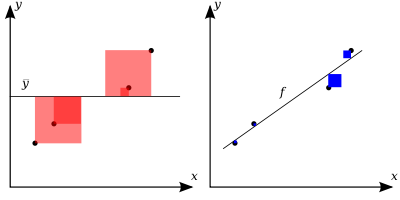

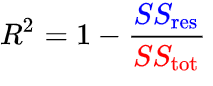

In [ ]:
lin_reg.score(X.reshape(-1,1), y.reshape(-1,1))

0.7723423602126415

###Calculating Loss 

In [ ]:
sum = 0
for val in X:
  sum = sum + ((val-(lin_reg.predict([val])))**2)
  #print(str(val) + " " + str(lin_reg.predict([[val]])))
loss = float(sum)/len(X)
print(loss)

22364984576914.617


###The Graph

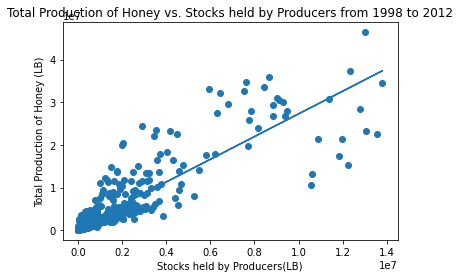

In [ ]:
plt.scatter(X, y)
plt.xlabel("Stocks held by Producers(LB)")
plt.ylabel("Total Production of Honey (LB)")
plt.title("Total Production of Honey vs. Stocks held by Producers from 1998 to 2012")
plt.plot(X, lin_reg.predict(X))


##Polynomial Regression

###Regression Data

The data comes from a rate law lab from AP Chemistry. The relation of choice is between time and molarity, so we can measure the rate at which the reaction is occuring.

Feel free to graph and play around with the data in the first 6 columns. Ignore the last 3 columns because they are unrelated to this activity.

###How It Works

The equation: $\hat{y} = b_{0} + b_{1}X_{1} + b_{2}X_{1}^{2}+b_{3}X_{1}^{3}+...+b_{n}X_{1}^{n}$

n is the maximal degree of the polynomial. 

Because of the format between of the bias($b_{0}$) and then there is a consecutive adding of weights ($b_{0}, b_{1}, b_{2}, b_{3}... b_{n}$) multiplied by the input variable($X_{1}$) it still retains a somewhat linear format.

In [ ]:
rateLawData = pd.read_csv("/content/drive/MyDrive/Workshop/RateLabData.csv")
rateLawData

,Time,Transmittance,Absorbance,[M],ln[M],1/[M],Unnamed: 6,Molarity,Absorbance(CV)
0,0,35.733368,0.446926,1.934745,0.286624,0.516864,NaN,0,0
1,3,33.529596,0.474572,2.054423,0.312690,0.486755,NaN,3.125E-06,0.102
2,6,34.251108,0.465325,2.014396,0.304145,0.496427,NaN,6.25E-06,0.252
3,9,35.118666,0.454462,1.967368,0.293886,0.508293,NaN,1.25E-05,0.471
4,12,36.023281,0.443417,1.919553,0.283200,0.520955,NaN,2.50E-05,0.971
...,...,...,...,...,...,...,...,...,...
96,288,83.178771,0.079988,0.346266,-0.460590,2.887951,NaN,NaN,NaN
97,291,83.468684,0.078476,0.339725,-0.468873,2.943559,NaN,NaN,NaN
98,294,83.649607,0.077536,0.335654,-0.474108,2.979258,NaN,NaN,NaN
99,297,83.902463,0.076225,0.329980,-0.481513,3.030490,NaN,NaN,NaN


###Setting Up the Variables

In [ ]:
X = rateLawData.iloc[:, 0].values
y = rateLawData.iloc[:, 3].values

In [ ]:
X

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231,
       234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270,
       273, 276, 279, 282, 285, 288, 291, 294, 297, 300])

In [ ]:
y

array([1.93474479, 2.05442285, 2.01439556, 1.96736791, 1.91955297,
       1.87492264, 1.8329562 , 1.79020613, 1.74851043, 1.70761779,
       1.67088191, 1.6300651 , 1.59317343, 1.55868112, 1.52315102,
       1.48990865, 1.45857879, 1.42356335, 1.39193579, 1.35947972,
       1.33164755, 1.3043034 , 1.27727042, 1.24799223, 1.22308619,
       1.19726578, 1.17424259, 1.14779664, 1.1241751 , 1.09966942,
       1.07780415, 1.0574125 , 1.03489309, 1.01615488, 0.99412142,
       0.97234318, 0.9542152 , 0.93289178, 0.91620561, 0.89973237,
       0.88117443, 0.86604306, 0.84671976, 0.83084173, 0.81610852,
       0.80042313, 0.78592546, 0.7725274 , 0.75621933, 0.74309141,
       0.72902755, 0.71602751, 0.70317632, 0.68940682, 0.67767573,
       0.66309949, 0.6525164 , 0.6390541 , 0.62768932, 0.61633594,
       0.60691745, 0.5965888 , 0.58547709, 0.57621155, 0.56699146,
       0.55781636, 0.54687598, 0.53965401, 0.53148076, 0.52074619,
       0.51179349, 0.5055626 , 0.49758931, 0.49050065, 0.48169

###Reshaping the Variables

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

###Formatting the Input Variable 

We need to do this to put the input variable into the $X_{1}^{1},X_{1}^{2}+X_{1}^{3}...+X_{1}^{n}$ where n is the degree.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree= 3)
X_poly = poly_features.fit_transform(X.reshape(-1,1))

In [ ]:
X[5]

array([15])

In [ ]:
X_poly[5]

array([1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03])

In [ ]:
X.shape

(101, 1)

In [ ]:
X_poly.shape

(101, 4)

###Training the Polynomial Regression

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Scoring Function

The same as the linear regression score function because they are from the same LinearRegression module.

In [ ]:
poly_reg.score(X_poly, y)

0.9990118408741958

###Calculating Loss 

In [ ]:
sum = 0
for val in X:
  sum = sum + ((val-lin_reg.predict([val]))**2)
  #print(str(val) + " " + str(lin_reg.predict([[val]])))
loss = float(sum)/len(X)
print(loss)

434350180193.74963


###Graph

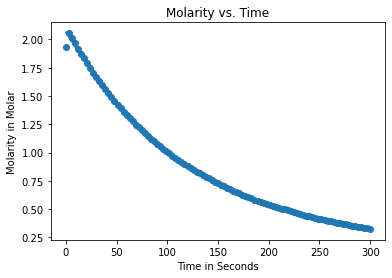

In [ ]:
plt.scatter(X, y)
plt.xlabel("Time in Seconds")
plt.ylabel("Molarity in Molar")
plt.title("Molarity vs. Time")
plt.plot(X, poly_reg.predict(X_poly))


###Trying New Degrees

How deep of a polynomial can you go?

In [ ]:
poly_features = PolynomialFeatures(degree = 13)
X_poly = poly_features.fit_transform(X)

###Train the New Regression Model

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Scoring Function

In [ ]:
poly_reg.score(X_poly, y)

0.7766832748053978

###Graph

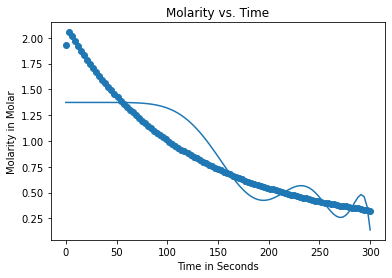

In [ ]:
plt.scatter(X, y)
plt.xlabel("Time in Seconds")
plt.ylabel("Molarity in Molar")
plt.title("Molarity vs. Time")
plt.plot(X, poly_reg.predict(X_poly))


##Convolutional Neural Networks

###How It Works

The Convolutional Neural Networks takes a smaller segment of the picture and then applies a filter to that specific smaller segment.

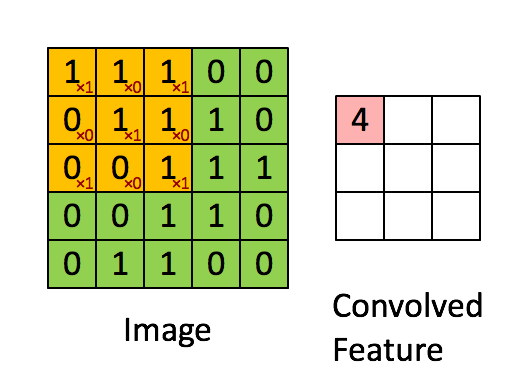

Then the convolved feature is passed in as input to the MaxPooling Layer where it takes the feature and finds the greatest value in the feature and outputs a smaller feature that represents the maximum of each time the filter passes through the convolved feature.

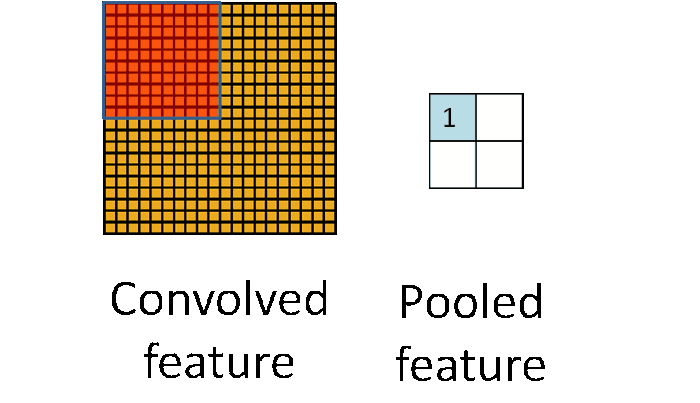

The max pooled feature is then flattened, which is basically turning a multidimensional input feature and then flattening it out to be a 1 dimensional array.



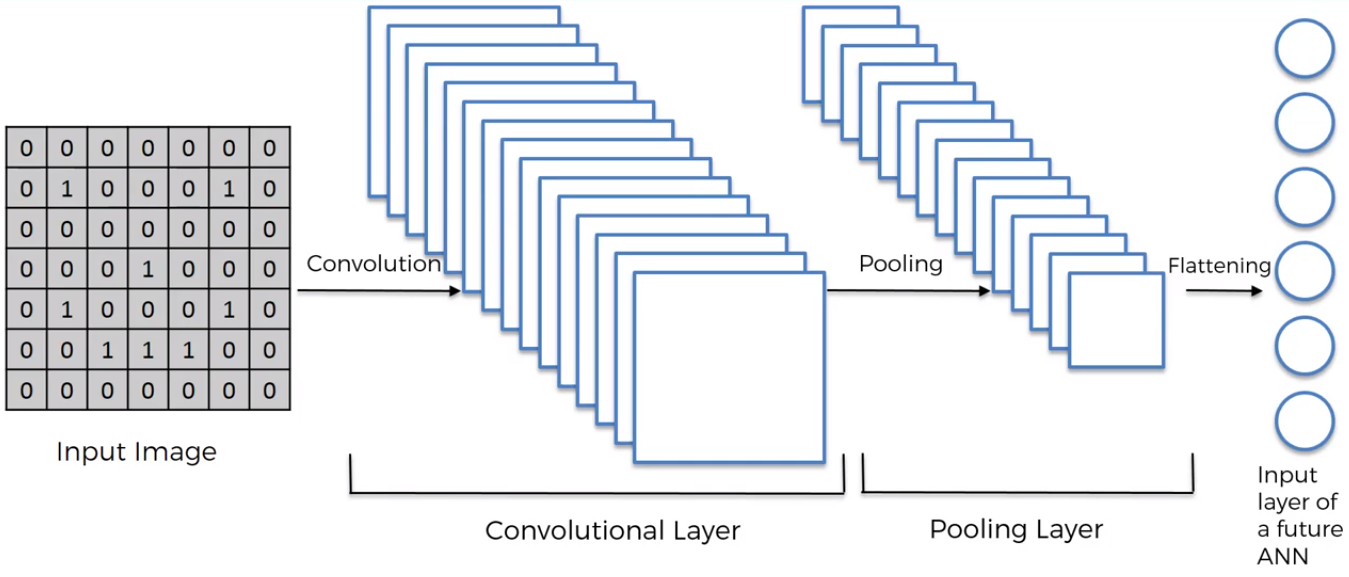



Once the flattening is finished, we input the flattened feature to the fully connected layer or the actual neural network itself. Neural networks work by taking an input multiplying by a weight and adding a bias like in linear regression, and then perform a non-linear activation function on the linearly transformed flattened input in order to add non-linearity to the output. 

We do this per every layer in the neural network until we reach the last layer which is the output layer. In this case there are ten neurons in this layer to symbolize the output from 0 to 9 through index of the output. Our last activation function is "softmax" because we need to squeeze everything to a probability from 0 to 1 with all the porbabilities in outputted totalling up to 1.



###ReLU(Rectified Linear Unit) Function

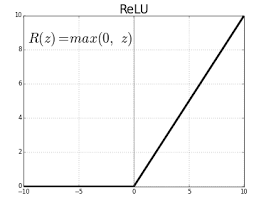

###General Overview

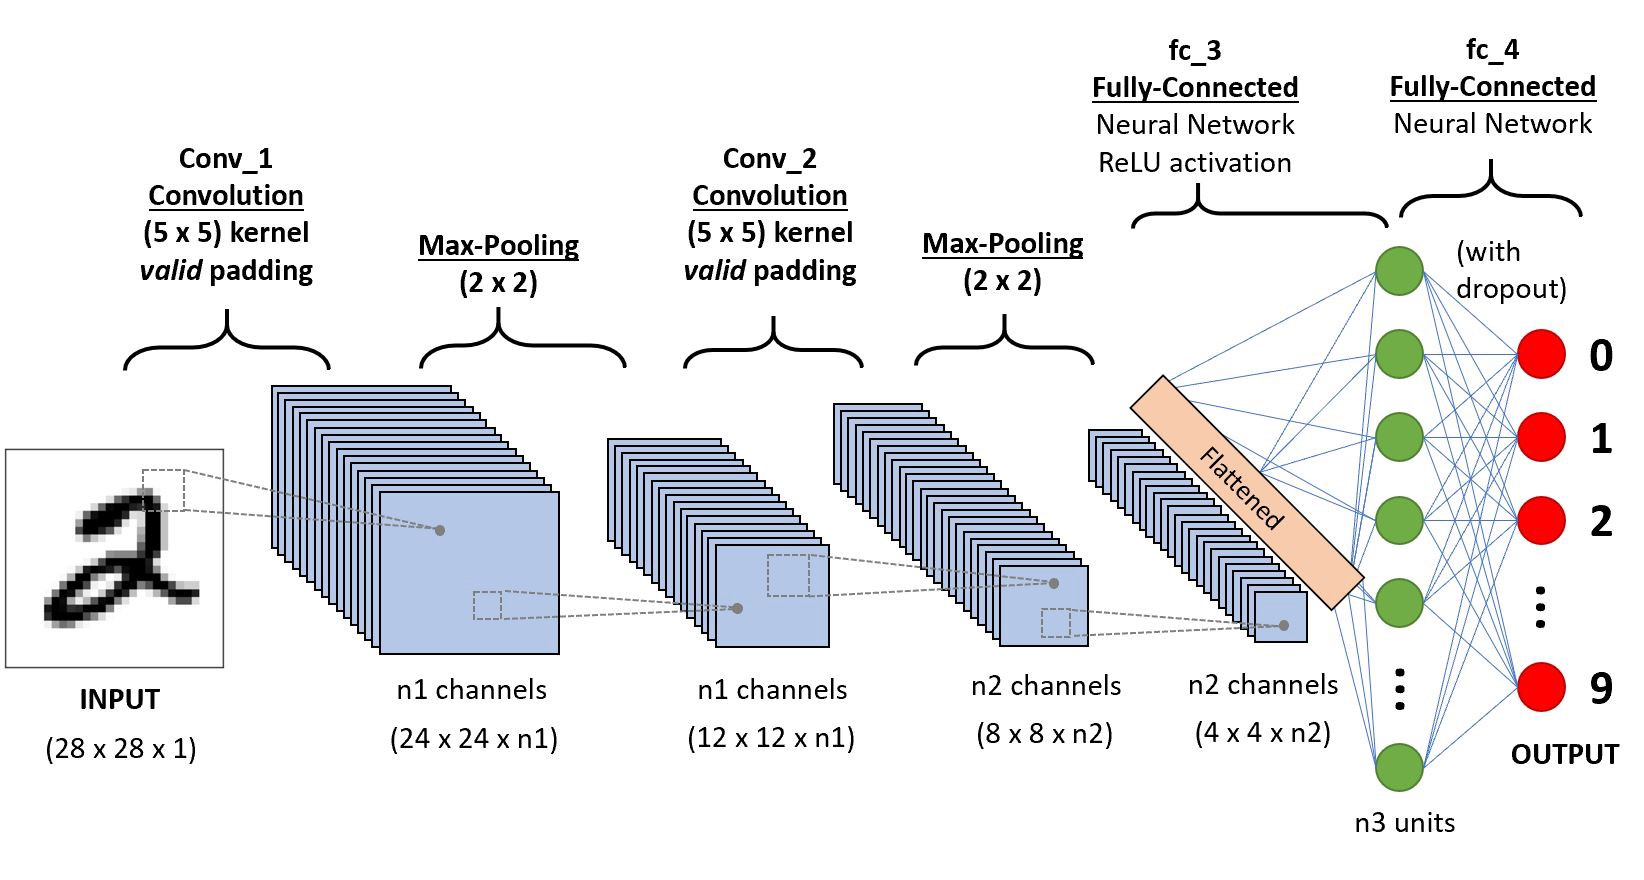

For More Information:

https://medium.datadriveninvestor.com/introduction-to-how-cnns-work-77e0e4cde99b

To go Deeper into the Math of Neural Networks

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi 

To Go Deeper into the Loss Function of the Neural Network:

https://gombru.github.io/2018/05/23/cross_entropy_loss/ 

###Importing the Data

The current dataset being used is an image dataset from keras that has 28 by 28 images of handwritten numbers. The task today is to create a CNN that porperly predicts what the image's handwriting is displaying.

In [ ]:
#!kaggle competitions download -c digit-recognizer
import tensorflow as tf
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()


###Normalizing the Data

We are just converting the input image values to have a domain of [0,1] instead of [0,255], to make it easier for the neural network to train on the images.

In [ ]:
Xtrain = tf.keras.utils.normalize(Xtrain, axis =1)
Xtest = tf.keras.utils.normalize(Xtest, axis = 1)

###Reshaping the Variables

In [ ]:
Xtrain.shape
print(Xtrain.shape)
Xtrain = Xtrain.reshape(60000, 28,28,1)

(60000, 28, 28)


###Viewing some Images

2


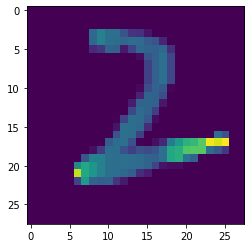

In [ ]:
image_index = 410 #Try Changing the index to see what pictures are in this dataset! (Any number from 0-59999 would work)
plt.imshow(Xtrain[image_index].reshape(28,28))
print(Ytrain[image_index]) 

In [ ]:
Xtrain[image_index]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

###Creating the Model

In [ ]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.nn as nn

model = models.Sequential()
model.add(layers.Convolution2D(32,(4,4), input_shape=(28,28,1), activation = 'relu')) #The Convolutional Layer and the Activation Layer together
model.add(layers.MaxPooling2D((2,2))) # Adding The Max Pooling Layer
model.add(layers.Flatten()) # Flattening the Input Layer
model.add(layers.Dense(128, activation=nn.relu)) #A neural network with 128 neurons and a ReLU activation function as non linearity.
model.add(layers.Dense(128, activation=nn.relu)) #Same as above
model.add(layers.Dense(10, activation=nn.softmax)) # The output layer with only 10 neurons to output the probabilities that a picture inputted would have a certain output from 1 to 10.

###Compilation and Fitting of Model

In compiling the fit of the model, we set the loss function to be calculated  sparse categorical cross entropy because we want to use categorizing each picture into defined categories.

We set the optimizer to adam, which is an optimizing algorithm meant to minimize the loss once the forward calculations are done.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Xtrain.shape)
model.fit(Xtrain, Ytrain, batch_size= 500, epochs = 10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 608,298
Trainable params: 608,298
Non-trainable params: 0
________________________________________________

KeyboardInterrupt: ignored

###Saving the Model

In [ ]:
model.save('convtensorflow.h5')

###Loading the Model

In [ ]:
new_model = models.load_model('convtensorflow.h5')
predictions = new_model.predict(Xtest.reshape(10000,28,28,1))

In [ ]:
print(predictions.shape)

(10000, 10)


###Accuracy Test

In [ ]:
from tensorflow.keras.models import load_model
import math

def max_index(input_list):
  max = -math.inf
  index = -1
  for i in range(len(input_list)):
    if(input_list[i] > max):
      max = input_list[i]
      index = i
  return index


incorrect_indices = []
correct = 0
for index in range(len(Xtest)):
  i = max_index(predictions[index])
  if(i == Ytest[index]):
    correct += 1
  else:
    incorrect_indices.append(i)

print(correct/10000.0)

0.9856


###Analyzing a Specific Image

[3.4639568e-06 1.0736927e-08 7.4473729e-09 9.1399190e-09 3.7374144e-07
 5.5302053e-06 9.9999046e-01 2.7369451e-10 1.1700691e-07 1.1381882e-09]
6
6


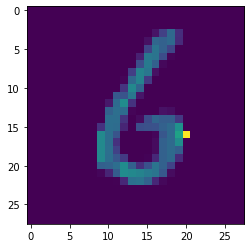

In [ ]:
case_number = 50
print(predictions[case_number])
print(max_index(predictions[case_number]))
print(Ytest[case_number])
plt.imshow(Xtest[case_number])